# Building A Simple HandWritten Digits Classifier Using MLPs

### Loading MNIST DataBase


In [1]:
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test)= mnist.load_data()

Using TensorFlow backend.


# Visualizing Loaded Data 

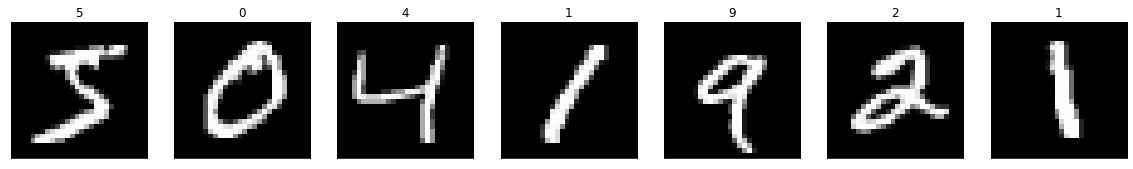

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig=plt.figure(figsize=(20,20))
for i in range(7):
    ax=fig.add_subplot(1,7,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(str(y_train[i]))
    

# Rescaling Images  

In [3]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

# One-Hot Encoding

In [8]:
from keras.utils import np_utils

print('Integer Valued Labels: ')
print(y_train[:15])

y_train_mod = np_utils.to_categorical(y_train,10)
y_test_mod = np_utils.to_categorical(y_test,10)

print('One-Hot Labels: ')
print(y_train_mod[:15])


Integer Valued Labels: 
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]
One-Hot Labels: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Building A MLP Architecture

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

mlp_model=Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512,activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(512,activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(10,activation='softmax'))

mlp_model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

# Compiling Our Model

In [16]:
mlp_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


# Calculating Accuracy without training 

In [19]:
score= mlp_model.evaluate(X_test,y_test_mod,verbose=0)
accuracy=score[1]*100

print('Test Accuracy: %.4f%%'%accuracy)

Test Accuracy: 10.4600%


# Train The Model


In [21]:
from keras.callbacks import ModelCheckpoint

checkpointer= ModelCheckpoint(filepath='mnist.model.best.hdf5',
                             verbose=1,save_best_only=True,
                             )

hist=mlp_model.fit(X_train,y_train_mod,batch_size=128,epochs=10,
                  validation_split=0.2,callbacks=[checkpointer],
                  verbose=1,shuffle=True) #verbose=1 lets u know when the weights are updated during the training.




Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 197us/step - loss: 0.2765 - accuracy: 0.9156 - val_loss: 0.1234 - val_accuracy: 0.9639

Epoch 00001: val_loss improved from inf to 0.12345, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 7s 155us/step - loss: 0.1152 - accuracy: 0.9657 - val_loss: 0.1052 - val_accuracy: 0.9700

Epoch 00002: val_loss improved from 0.12345 to 0.10520, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 7s 154us/step - loss: 0.0807 - accuracy: 0.9757 - val_loss: 0.0973 - val_accuracy: 0.9722

Epoch 00003: val_loss improved from 0.10520 to 0.09727, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 7s 154us/step - loss: 0.0645 - accuracy: 0.9804 - val_loss: 0.0949 - val_accuracy: 0.9755

Epoch 00004: val_loss improved from 0.09727 to 0.09489, saving model to mnis

# Loading the model with learned weights 

It should be noted that the this is the best set of weights that were learned in the 6th Epoch. After that validication accuracy started decreasing.

In [22]:
mlp_model.load_weights('mnist.model.best.hdf5')


# Calculating Classification Accuracy on test set 

In [23]:
score= mlp_model.evaluate(X_test,y_test_mod,verbose=0)
accuracy=score[1]*100

print('Test Accuracy: %.4f%%'%accuracy)

Test Accuracy: 98.1800%
